In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img=cv2.imread('face.jpg', 0)
img.shape

(1063, 1600)

In [31]:
cv2.imshow('frame',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

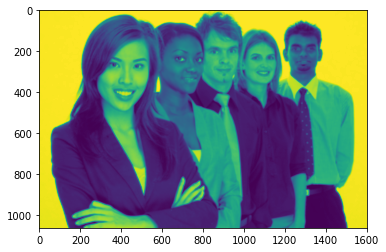

In [19]:
plt.imshow(img, interpolation='bicubic')

In [5]:
img.shape

(1063, 1600, 3)

In [6]:
# поменяем размер изображения
resized = cv2.resize(img, (500,500))
cv2.imshow('frame',resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# для удобства создадим функцию вывод изображения
def image_show(image):
    """
    вывод изображения

    """    
    cv2.imshow('name',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
image_show(resized)

In [11]:
# изменить тип массива
diff_type=img.astype(np.uint16)

In [20]:
# Черно-белое изображение
ret, threshold_image = cv2.threshold(img, 127, 255, 0)
image_show(threshold_image)

Функция threshold возвращает изображение, в котором все пиксели, которые темнее (меньше) 127 заменены на 0, а все, которые ярче (больше) 127, — на 255.

In [23]:
# Надписи на изображении
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (250,250)
fontScale              = 1
fontColor              = (0,0,0)
lineType               = 2

cv2.putText(img,'Hello World!', 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)
image_show(img)

In [37]:
# рамка
cv2.rectangle(img, (200, 200), (800, 800), (0, 255, 255), 2)
image_show(img)

***Обнаружение лица на изображении и вывод рамки***

In [17]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ru0tpav\\AppData\\Local\\Continuum\\anaconda3\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
image = cv2.imread('face.jpg')
#gray = cv2.imread('face.jpg', 0)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # конвентировать изображение в оттенки серого
faces = face_cascade.detectMultiScale(
    image,
    scaleFactor= 1.1,
    minNeighbors= 10
)
print("Лиц обнаружено: ",(len(faces)))
# Рисуем квадраты вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
image_show(image)

Лиц обнаружено: 5


***Обнаружение лица на видео и вывод рамки***

In [1]:
import cv2
import numpy as np

In [7]:
# загружаем классификатор хаар каскадов, в коотром находятся методы распознавания, в данном случае лица
face_cascade = cv2.CascadeClassifier('C:\\Users\\ru0tpav\\AppData\\Local\\Continuum\\anaconda3\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) 
while True: 
    ret, frame = cap.read() 
    if ret == True: 

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

        faces = face_cascade.detectMultiScale( 
        frame, 
        scaleFactor= 1.2, 
        minNeighbors= 5, 
        minSize=(10, 10)  
        ) 
        for (x, y, w, h) in faces: 
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2) 
            cv2.imshow('name',frame) 

        if cv2.waitKey(10) == 0x1b: # ESC - выход из видео
            break 

    else: 
        break 

cap.release() 
cv2.destroyAllWindows()

***Распознавание человека на видео***

In [34]:
import cv2, os
import numpy as np
from PIL import Image

In [35]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ru0tpav\\AppData\\Local\\Continuum\\anaconda3\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')

# Для каждого человека вводим порядковый номер (должено быть целое число) 
face_id = input('user id   ==>  ')

print(" Смотрим в камеру и ждем")


enter user id   ==>  1
 Смотрим в камеру и ждем


#### Запись образцов изображений, полученных с камеры ####

Каждый новый образец необходимо записывать перед запуском кода с распознаванием

In [36]:
cap=cv2.VideoCapture(0)
count = 0
while True: 
    ret, frame = cap.read() 
    if ret == True: 

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
        
        # обнаружение лица
        faces = face_cascade.detectMultiScale( 
        frame, 
        scaleFactor= 1.2, 
        minNeighbors= 4 
        )
        # рамка для обнаруженного лица
        for (x, y, w, h) in faces: 
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2) 
            
            count=count+1
            
            # Сохранение изображений с камеры 
            cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", frame[y:y+h,x:x+w])
            cv2.imshow('name',frame) 
        
        # закрытие камеры 
        if cv2.waitKey(10) == 0x1b: # ESC 
            break
            
        # Делаем 40 образцов для одного лица
        elif count == 40: 
            break

    else: 
        break 

cap.release()  
cv2.destroyAllWindows()

#### Создание обученной модели trainer/trainer.yml на основе данных в директории dataset ####

In [38]:
# Путь к образцам изображений
path = 'dataset'

# LBPH (LOCAL BINARY PATTERNS HISTOGRAMS) Face Recognizer(распознавание по гистограмме)
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier('C:\\Users\\ru0tpav\\AppData\\Local\\Continuum\\anaconda3\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')

def getImagesAndLabels(path):
    """ 
    функция возвращает образцы лиц, котрые находятся в папке "dataset"
    и их индексы
    
    """
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]   # os.path.join - соединяет пути с учётом особенностей операционной системы.
    faceSamples=[]                                                  # os.listdir('dataset') - список из наименований файлов, которые в папке dataset
    ids = []                                                        # на выходе получим ['dataset\\User.1.1.jpg', 'dataset\\User.1.10.jpg',

    
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # преобразование в оттенки серого
        img_numpy = np.array(PIL_img,'uint8') # форматирование в формат 'uint8'
        id = int(os.path.split(imagePath)[-1].split(".")[1]) # извлечение индекса
        faces = detector.detectMultiScale(img_numpy) # определение лица на изображении
        
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    
    return faceSamples,ids

#Функция «getImagesAndLabels (path)» будет принимать все фотографии в каталоге: «dataset /», возвращая 2 массива: «Идентификаторы(lds)» и «Лица(Faces)». 
#С этими массивами в качестве входных данных мы будем «обучать наш распознаватель»:

print (" Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path) # получили все индексы и изображения лиц
recognizer.train(faces, np.array(ids)) # получили все индексы и изображения лиц


# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml') # recognizer.save() worked on Mac, but not on Pi

# Print the numer of faces trained and end program
print(" faces trained = ",len(np.unique(ids)))

 Training faces. It will take a few seconds. Wait ...
 faces trained. 2


In [39]:
import cv2, os
import numpy as np
from PIL import Image

#### Запуск камеры и проверка работоспособности на распознавание 

In [40]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = 'C:\\Users\\ru0tpav\\AppData\\Local\\Continuum\\anaconda3\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0

# names related to ids: example ==> Alexander: id=1
names = ['None', 'Alexander', 'Egor'] 

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)

while True:
    ret, img =cam.read()
    if ret==True:
        
        #img = cv2.flip(img, -1) # Flip vertically
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale( 
            img,
            scaleFactor = 1.2,
            minNeighbors = 5,
            minSize = (10, 10)
           )

        for(x,y,w,h) in faces:
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        #Принимает в качестве параметра захваченную часть лица, подлежащую анализу, и возвращает своего вероятного владельца, 
        #указывая его идентификатор и степень уверенности распознавателя в связи с этим совпадением. 
        #в результате получаем чем больше процент, тем выше точность.
            if (confidence < 100):
                id = names[id]
                confidence = "  {0}%".format(round(100 - confidence))
            else:
                id = "unknown"
                confidence = "  {0}%".format(round(100 - confidence))

            cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
            cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  

        cv2.imshow('camera',img) 
        
        if cv2.waitKey(10) == 0x1b:
            break
    else:
        break
        
cam.release()
cv2.destroyAllWindows()